# (a) (4 pts) Generate dotplot matrix

In [138]:
import numpy as np

def dotplot_matrix(seqA,seqB,w,s):
    offset=int(w/2)
    #to put 1 in the center of matching w
    dp = np.zeros((len(seqA),len(seqB)), dtype = int) #making matrix of zeros
    for i in range(len(seqA)-w+1):
        for j in range(len(seqB)-w+1):
            seq1=seqA[i:i+w]
            seq2=seqB[j:j+w]
            counter=0
            for k in range(w):
                if seq1[k]==seq2[k]:
                    #increment counter
                    counter += 1

            if counter >= s:
                dp[i+offset][j+offset] = 1
    #putting 1's when matched and zeros by default in matrix
    return dp
# i used sequences from notes
seqA = "WINDQWS" 
seqB = "WQNDERS"
w = 2
s = 2         
print(dotplot_matrix(seqA,seqB, w, s))


[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


# (b) (4 pts) The Dotplot as ASCII art

In [139]:
from Dotplot_matrix import dotplot_matrix
#function will generate ASCII dotplot using five parameters
def dotplot2Ascii(dp, seqA, seqB, heading, filename):
    fl=open(filename,'w')
    #creating text file
    print(heading, file = fl)
    print('\n', file = fl)
    print(' ' + '|' + seqB, file = fl)
    print('-+' + '-' * len(seqA), file = fl)
    #writing seqB on x axis in the file
    for i in range(len(dp)):
        print(seqA[i] + '|', file = fl,end='')
        #writing seqA on y axis
        for j in range(len(dp[0])):
            if dp[i][j] == 0:
            #if dp index has 0 printing space to the file
                print(" ", end = '',file=fl)
            elif dp[i][j] == 1:
            #if 1, printing * to the file
                print("*", end = '',file=fl)
        print(file=fl)

            
seqA = "peter piper picked a peck of pickled peppers" 
seqB = "a peck of pickled peppers peter piper picked"
heading = "Peter Piper's first dotplot"        
dp = dotplot_matrix(seqA, seqB, 5, 4)
print(dotplot2Ascii(dp, seqA, seqB, "Peter Piper's first dotplot", "mydotplot.txt"))


None


# (c) (4 pts) Graphical output using matplotlib

None


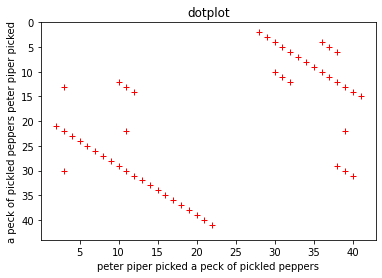

In [140]:
import numpy as np
import matplotlib.pylab as plt
from Dotplot_matrix import dotplot_matrix

hdA = "peter piper picked a peck of pickled peppers" 
hdB = "a peck of pickled peppers peter piper picked"        
dp = dotplot_matrix(hdA, hdB, 5, 4)
# this function will create dotplot,save it in file
def dotplot2Graphics(dp,hdA,hdB,heading,filename):
    filename=open(filename,'w')
    #creating .png file
    x = []
    y = []
    #looping in the matrix
    for i in range(len(dp)):
        for j in range(len(dp[0])):
            # accessing the index
            if dp[i,j] == 1:
                x.append(j)
                y.append(i)
    plt.plot(x,y,'ro', marker = '+')
    # to invert the plot
    plt.ylim([len(dp), 0])
    plt.xlabel(hdA)
    #labeling x and y axis
    plt.ylabel(hdB)
    plt.title(heading)
    plt.savefig(heading)
    #saving figure to a .png file
    #plt.show()
print(dotplot2Graphics(dp, hdA, hdB, "dotplot", "dotplot.png"))

# (d) (4 pts) Write a script

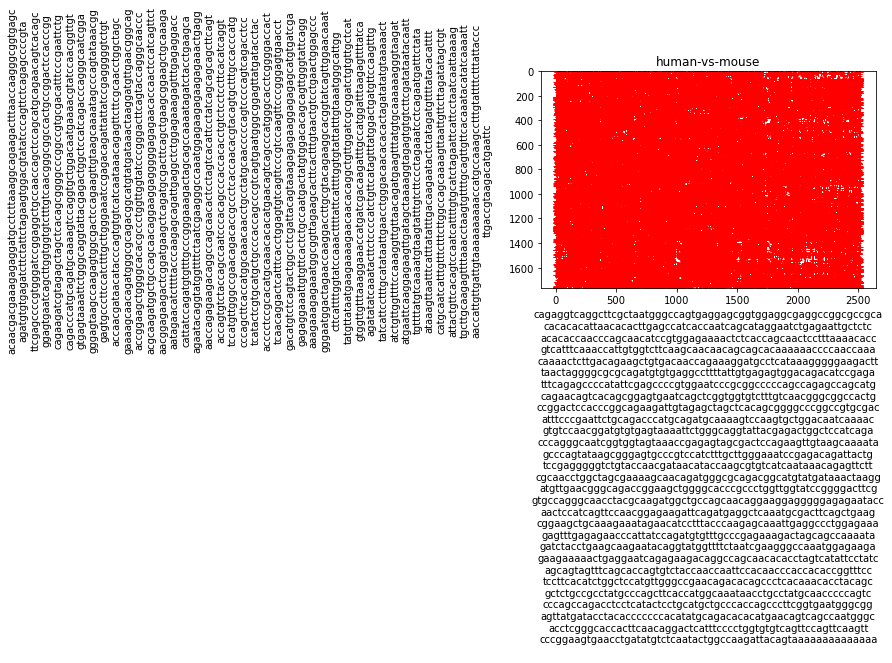

In [144]:
# i have used _plot.pyfile
%run _plot.py 10 6 human_pax6_NM_001604.fasta mouse_pax6_NM_013627.fasta human-vs-mouse human-mouse.png

# (e) (4 pts) Generate some nice dotplots

# (a) human_pax6_NM_001604.fasta versus mouse_pax6_NM_013627.fasta

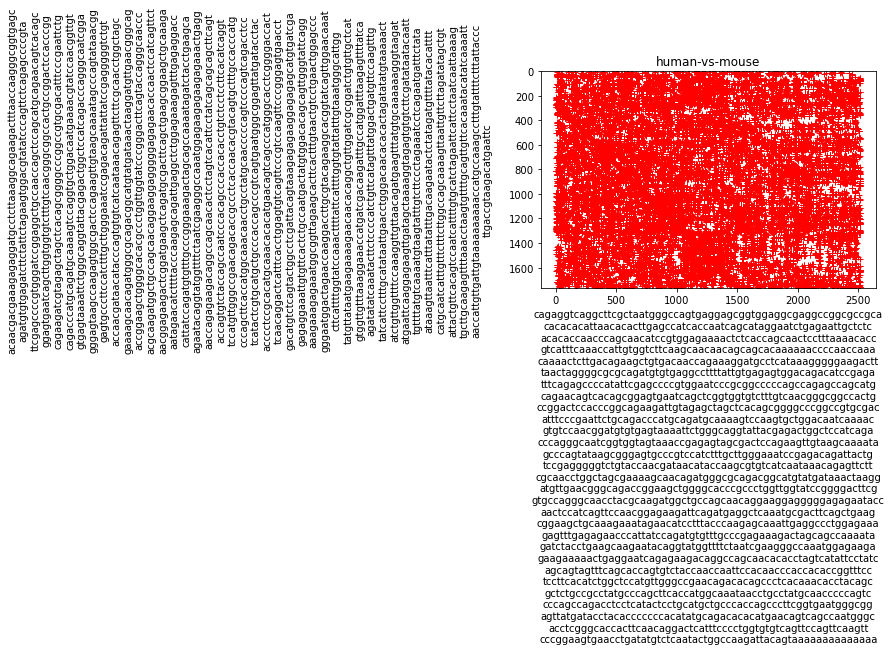

In [142]:
%run _plot.py 11 7 human_pax6_NM_001604.fasta mouse_pax6_NM_013627.fasta human-vs-mouse human-mouse.png

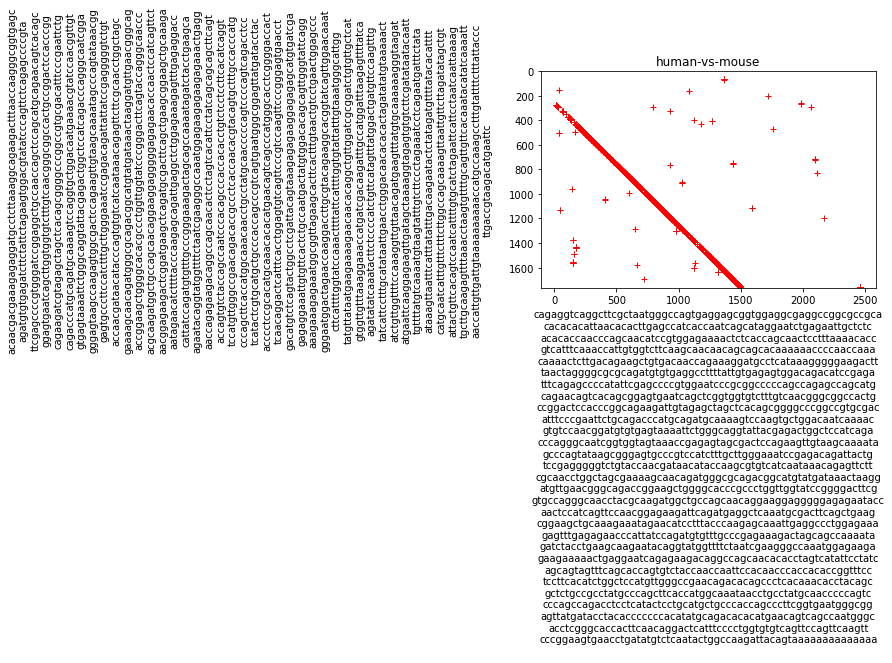

In [146]:
%run _plot.py 15 12 human_pax6_NM_001604.fasta mouse_pax6_NM_013627.fasta human-vs-mouse human-mouse.png

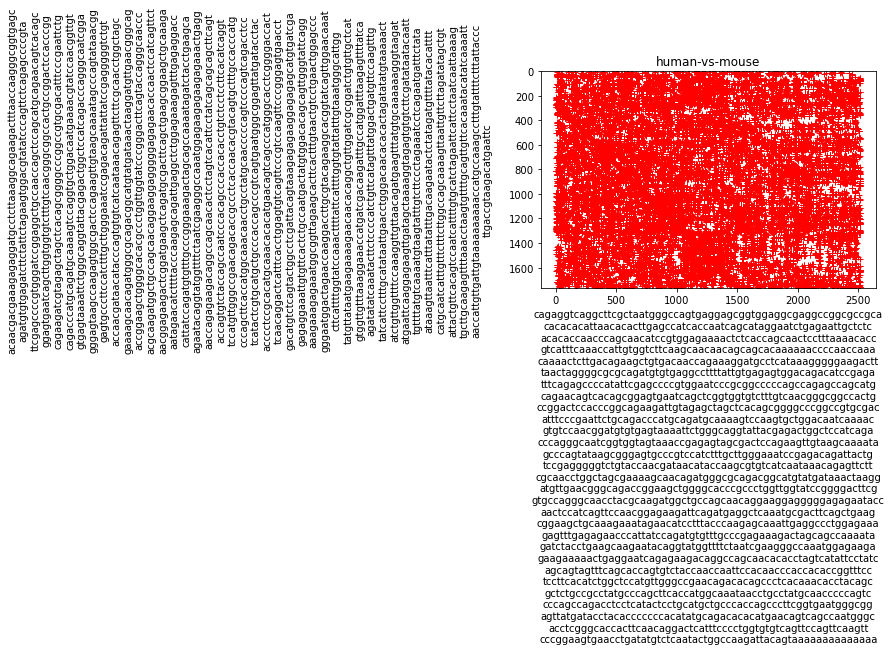

In [147]:
%run _plot.py 11 7 human_pax6_NM_001604.fasta mouse_pax6_NM_013627.fasta human-vs-mouse human-mouse.png

# (b) PAX6_HUMAN_P26367.fasta versus eyeless_NP_001014693.1.fasta

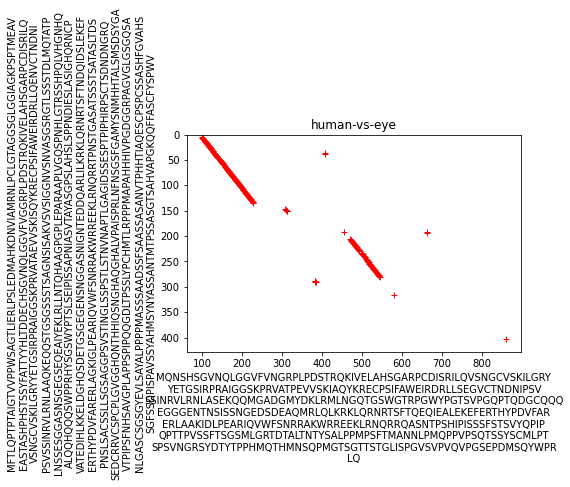

In [148]:
%run _plot.py 10 6 PAX6_HUMAN_P26367.fasta eyeless_NP_001014693.1.fasta human-vs-eye human-eye.png

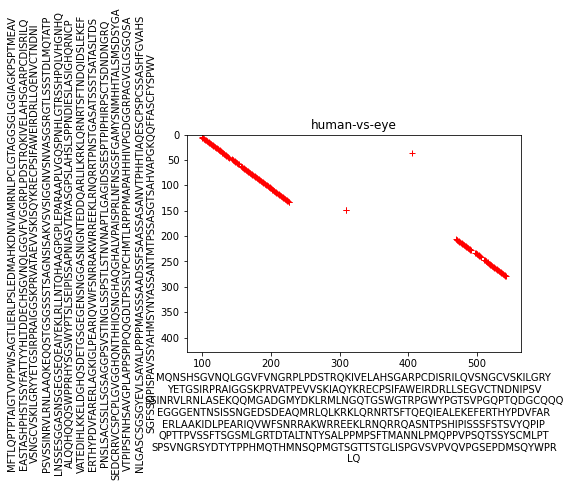

In [149]:
%run _plot.py 11 7 PAX6_HUMAN_P26367.fasta eyeless_NP_001014693.1.fasta human-vs-eye human-eye.png

# Ex.4 (Optional: 2 pts) Exact change please

In [150]:
from collections import Counter
# this will give possibilities to get exact change of 1 euro
def possible_ways(total, coins):
    # add ways
    ways = [[Counter()]] + [[] for i in range(total)]
    for coin in coins:
        for i in range(coin, total + 1):
            
            ways[i] += [way + Counter({coin: 1}) for way in ways[i-coin]]
    return ways[total]
# count possibilities
count = 0    
for way in possible_ways(total=100, coins=(50,20,10,5,2,1)):
    coins = (coin for coin,count in way.items() for i in range(count))
    count += 1
print("Total combinations:",count)
print('\n')

Total combinations: 4562




# Ex.3 (Optional: 2 pts) The Icosian Game

In [153]:
Nodes = {'R': ['W','Q','S'], 'W': ['R','X','V'], 'Q': ['R','Z','P'], 'S': ['R', 'N', 'T'], 'Z': ['X', 'Q', 'B'],
               'P':['Q','C','N'],'X':['H','W','Z'],
              'B':['C','G','Z'],'C':['B','D','P'],'N':['M','P','S'],'H':['G','J','X'],'G':['B','F','H'],'D':['C','F','M'],
               'M':['D','L','N'],
              'F':['D','G','K'],'V':['J','T','W'],'J':['H','K','V'],'K':['F','J','L'],
               'L':['K','M','T'],'T':['L','S','V']}
def route(graph, start, end, path=[]):
    path = path + [start] 
    if start == end:
        return [path]
    if start not in graph:
        return []
    paths = []
    for node in graph[start]:
        
        if node not in path:
            
            newpaths = route(graph, node, end, path)
            for newpath in newpaths:
                paths.append(newpath)
        
    return paths


l = ['W','Q','S']
for i in l:
    sol =route(Nodes, 'R', i, path=[])
#print(sol)
for s in sol: 
    if len(s)>2:
        print(s)
            


['R', 'W', 'X', 'H', 'G', 'B', 'C', 'D', 'F', 'K', 'J', 'V', 'T', 'L', 'M', 'N', 'S']
['R', 'W', 'X', 'H', 'G', 'B', 'C', 'D', 'F', 'K', 'J', 'V', 'T', 'S']
['R', 'W', 'X', 'H', 'G', 'B', 'C', 'D', 'F', 'K', 'L', 'M', 'N', 'S']
['R', 'W', 'X', 'H', 'G', 'B', 'C', 'D', 'F', 'K', 'L', 'T', 'S']
['R', 'W', 'X', 'H', 'G', 'B', 'C', 'D', 'M', 'L', 'K', 'J', 'V', 'T', 'S']
['R', 'W', 'X', 'H', 'G', 'B', 'C', 'D', 'M', 'L', 'T', 'S']
['R', 'W', 'X', 'H', 'G', 'B', 'C', 'D', 'M', 'N', 'S']
['R', 'W', 'X', 'H', 'G', 'B', 'C', 'P', 'N', 'M', 'D', 'F', 'K', 'J', 'V', 'T', 'S']
['R', 'W', 'X', 'H', 'G', 'B', 'C', 'P', 'N', 'M', 'D', 'F', 'K', 'L', 'T', 'S']
['R', 'W', 'X', 'H', 'G', 'B', 'C', 'P', 'N', 'M', 'L', 'K', 'J', 'V', 'T', 'S']
['R', 'W', 'X', 'H', 'G', 'B', 'C', 'P', 'N', 'M', 'L', 'T', 'S']
['R', 'W', 'X', 'H', 'G', 'B', 'C', 'P', 'N', 'S']
['R', 'W', 'X', 'H', 'G', 'B', 'Z', 'Q', 'P', 'C', 'D', 'F', 'K', 'J', 'V', 'T', 'L', 'M', 'N', 'S']
['R', 'W', 'X', 'H', 'G', 'B', 'Z', 'Q', 'P', '